In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 유방암 데이터 세트 준비하기

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [18]:
# 입력 데이터 확인하기

print(cancer.data.shape, cancer.target.shape)

# 569개의 샘플과 30개의 특성이 있구나

(569, 30) (569,)


In [19]:
# 처음 3개의 샘플을 출력해 보자

cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

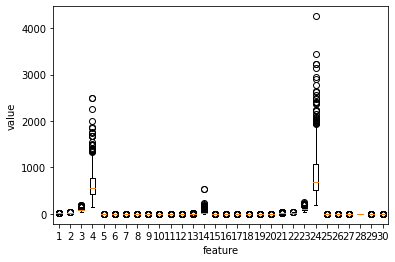

In [20]:
# 박스 플롯으로 특성의 사분위 관찰하기

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

# 출력되는 그래프로 데이터를 전반적으로 살펴볼 수 있다 !
# 보면 4, 14, 24 번째 특성들이 다른 특성과 꽤 차이가 나는 것을 확인해 볼 수 있다 !

In [21]:
# 눈에 띄는 특성들 살펴보기

cancer.feature_names[[3, 13, 23]]

# 출력 결과를 보니 전부 넓이와 관련된 특성이라는 것을 확인할 수 있다.

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [22]:
# 타깃 데이터 확인하기

np.unique(cancer.target, return_counts=True)

# 출력 결과는 우선 cancer.target에는 0과 1값만 존재하고 && 0은 212개(음성클래스 즉 정상종양) 1은 357개(양성클래스 즉 악성종양) 존재함을 의미함 !

(array([0, 1]), array([212, 357], dtype=int64))

In [23]:
# 훈련 데이터 세트 저장하기

x = cancer.data
y = cancer.target

# 훈련데이터 세트 준비 완료 !

## 04-5 로지스틱 회귀로 모델을 만들어 보자 !

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# train_test_split() 으로 훈련 데이터 세트 나누기

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

# stratify = y : y에 들어있는 클래스 비율을 따르도록 
# test_size = 0.2 : 디폴트는 25%

In [26]:
# 잘 나눠졌는지 결과 확인하기

print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [27]:
np.unique(y_train, return_counts = True)

(array([0, 1]), array([170, 285], dtype=int64))

### 로지스틱 회귀 구현하기

In [28]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식 계산
        return z

    def backprop(self, x, err):
        w_grad = x * err  # 가중치에 대한 그레이디언트 계산
        b_grad = 1 * err  # 절편에 대한 그레이디언트 계산
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, 100, None)  # 안전한 np.exp( ) 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 함수
        return a

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])  # 가중치를 전부 1로 초기화
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err);
                self.w -= w_grad
                self.b -= b_grad

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        a = self.activation(z)  # 활성화 함수
        return a > 0.5  # 임계 함수 ?

In [29]:
# 모델 훈련하기

neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [31]:
# 테스트 세트를 사용해 모델의 정확도 평가하기

np.mean(neuron.predict(x_test) == y_test)

0.631578947368421

## 04-6 단일층 신경망을 만들어 보자

In [33]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []  # 손실 함수의 결괏값을 저장할 리스트 추가

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선의 방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        z = np.clip(z, -100, None)  # 클리핑해서 숫자 조정 ..
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            # 인덱스 섞기
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # 아마 로지스틱 손실 함수 ?! 손실값을 누적해서 더하고
            self.losses.append(loss/len(y))  # 누적해서 더한 손실값들의 평균을 losses 배열에 넣는다.

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        return np.array(z) > 0  # 스텝 함수 적용

    def score(self, x, y):  # 정확도 측정 함수
        return np.mean(self.predict(x) == y)

In [34]:
# 단일층 신경망 훈련하기

layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

# 정확도가 높아진 것을 확인할 수 있다.
# 에포크마다 훈련 세트를 무작위로 섞어 손실 함수의 값을 줄였기 때문 !

0.9473684210526315

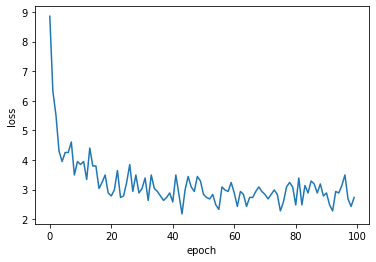

In [36]:
# 손실 함수의 누적값 확인하기

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 04-7 사이킷런으로 로지스틱 회귀 수행하기

In [37]:
from sklearn.linear_model import SGDClassifier

In [38]:
sgd = SGDClassifier(loss='log', max_iter = 100, tol = 1e-3, random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

# fit 메서드로 훈련(~_train)하고 && score 메서드로 정확도 계산 !(~_test)

0.8333333333333334

In [ ]:
# 사이킷런으로 예측하기

sgd.predict(x_test[0:10])

# 사이킷런은 입력 데이터로 2차원 배열만 받아들인다.